## Prediction Using Supervised ML

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied

#### By Indrajith V

### Importing libraries 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings as wg
wg.filterwarnings('ignore')

### Importing Dataset

In [3]:
path = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'

In [4]:
df = pd.read_csv(path)
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## EDA

In [44]:
df.shape

(25, 2)

In [45]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [46]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [47]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


### Data Visualisation 

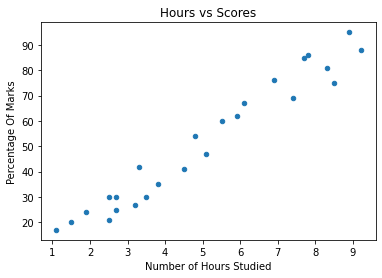

In [48]:
df.plot(kind = 'scatter', x = 'Hours', y = 'Scores')
plt.title('Hours vs Scores')
plt.xlabel('Number of Hours Studied')
plt.ylabel('Percentage Of Marks')
plt.show()

### Split to independent and dependent variables

In [49]:
x = df.iloc[:, :-1].values    #y = mx+c

y = df.iloc[:, 1].values  

### Splitting data into training and testing data

In [50]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0) 

### Choosing and fitting our model

In [51]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

### Predicting the output

In [52]:
y_pred = reg.predict(x_test)
df2 = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df2

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [53]:
m = reg.coef_
c = reg.intercept_
fit_line = m*x+c
fit_line

array([[26.79480124],
       [52.56250809],
       [33.73226078],
       [86.25874013],
       [36.70545772],
       [16.88414476],
       [93.19619966],
       [56.52677068],
       [84.27660883],
       [28.77693254],
       [78.33021494],
       [60.49103328],
       [46.6161142 ],
       [34.72332643],
       [12.91988217],
       [90.22300272],
       [26.79480124],
       [20.84840735],
       [62.47316457],
       [75.357018  ],
       [28.77693254],
       [49.58931115],
       [39.67865467],
       [70.40168976],
       [79.32128059]])

### ploting the graph for train dataset

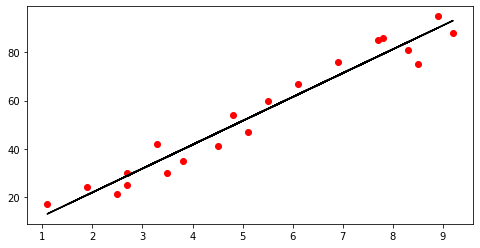

In [54]:
plt.figure(figsize=(8,4))
plt.scatter(x_train,y_train,color = 'red')
plt.plot(x,fit_line,color = 'black')

### ploting the graph for test dataset

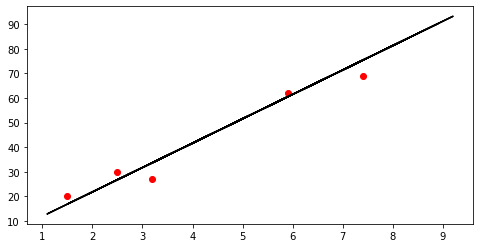

In [55]:
plt.figure(figsize=(8,4))
plt.scatter(x_test,y_test,color = 'red')
plt.plot(x,fit_line,color = 'black')

<b>Predict the score if a student studies for 9.25hr/day<b>

In [66]:
studied_hrs = 9.25
pre_score = reg.predict([[studied_hrs]])
print('If a student studied for {} hours then he will score {} in the Examination'.format(studied_hrs,pre_score))

If a student studied for 9.25 hours then he will score [93.69173249] in the Examination


In [57]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print('r2_score is:',r2_score(y_test,y_pred))
print('Mean Absolute error is:',mean_absolute_error(y_test,y_pred))
print('Mean Squared error is:',mean_squared_error(y_test,y_pred))

r2_score is: 0.9454906892105356
Mean Absolute error is: 4.183859899002975
Mean Squared error is: 21.5987693072174


- The closer the value of r-square to 1, the better is the model fitted.
- MAE and MSE have value range from 0 to infinity 

